In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from config import gkey
import us
from pprint import pprint
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



resource_path = "../../Resources"
all_by_state_daily_path = f"{resource_path}/AllByState-Daily.csv"

In [2]:
all_by_state_daily_df = pd.read_csv(all_by_state_daily_path)
all_by_state_daily_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
0,0,0,2020-03-10,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
1,0,0,2020-03-11,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
2,0,0,2020-03-12,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
3,1,1,2020-03-13,0,0.0,0,Alaska,AK,1,1,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
4,1,1,2020-03-15,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0


In [3]:
max_date = all_by_state_daily_df["Date"].max()
max_date

'2020-07-23'

In [4]:
max_date_df = all_by_state_daily_df.sort_values("Date", ascending = False)
max_date_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
3397,2866,2909,2020-07-23,43,0.0148,0,Montana,MT,96,97,1,0,46.9219,-110.4544,135639.85,1038180.0,7.653945,29784.234687,49833.0
3533,23502,23818,2020-07-23,316,0.0133,0,Nebraska,NE,327,332,5,0,41.1254,-98.2681,76243.49,1900182.0,24.922547,31121.371768,55236.0
3125,46617,48053,2020-07-23,1436,0.0299,0,Mississippi,MS,969,982,13,0,32.7416,-89.6787,45729.42,2962109.0,64.774690,23556.907406,38418.0
2989,47120,48721,2020-07-23,1601,0.0329,0,Minnesota,MN,751,760,9,0,45.6945,-93.9002,77477.43,5523621.0,71.293291,36262.683567,60000.0
2853,78036,84431,2020-07-23,6395,0.0757,0,Michigan,MI,694,701,7,0,43.3266,-84.5361,55526.86,9935027.0,178.922903,30369.333747,52203.0


In [6]:
grouped_state_name = max_date_df.groupby(["State Name"])
grouped_state_name.first()

population_density = grouped_state_name["Population Density"].mean()
population_density

deaths = grouped_state_name["Deaths Diff"].sum()
deaths

State Name
Alabama            1397
Alaska               19
Arizona            3063
Arkansas            386
California         8201
Colorado           1786
Connecticut        4410
Delaware            529
Florida            5516
Georgia            3361
Hawaii               26
Idaho               138
Illinois           7560
Indiana            2880
Iowa                820
Kansas              322
Kentucky            684
Louisiana          3574
Maine               118
Maryland           3409
Massachusetts      8484
Michigan           6395
Minnesota          1601
Mississippi        1436
Missouri           1189
Montana              43
Nebraska            316
Nevada              709
New Hampshire       405
New Jersey        15729
New Mexico          596
New York          32594
North Carolina     1756
North Dakota         97
Ohio               3256
Oklahoma            477
Oregon              273
Pennsylvania       7093
Rhode Island       1001
South Carolina     1334
South Dakota        121
Tenne

In [7]:
pop_density_df = pd.DataFrame({"Population Density": population_density,
                                "Deaths Diff": deaths})
pop_density_vs_deaths = pop_density_df.sort_values("Population Density", ascending = False).head()
pop_density_vs_deaths

,Population Density,Deaths Diff
State Name,,
New Jersey,1259.397075,15729
Rhode Island,1027.895605,1001
Massachusetts,880.152360,8484
Connecticut,739.092300,4410
Maryland,627.327655,3409


In [8]:
pop_density_vs_deaths_df = pop_density_df.sort_values("Population Density", ascending = False)
pop_density_vs_deaths_df

,Population Density,Deaths Diff
State Name,,
New Jersey,1259.397075,15729
Rhode Island,1027.895605,1001
Massachusetts,880.152360,8484
Connecticut,739.092300,4410
Maryland,627.327655,3409
Delaware,485.051173,529
Florida,469.666909,5516
New York,424.151807,32594
California,403.176406,8201


In [9]:
deaths_by_pop_density_df = pop_density_df.sort_values("Deaths Diff", ascending = False)
deaths_by_pop_density_df

,Population Density,Deaths Diff
State Name,,
New York,424.151807,32594
New Jersey,1259.397075,15729
Massachusetts,880.152360,8484
California,403.176406,8201
Illinois,233.446533,7560
Pennsylvania,285.775169,7093
Michigan,178.922903,6395
Florida,469.666909,5516
Texas,124.836045,4622


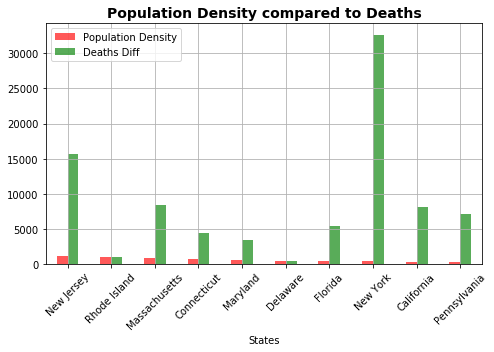

In [10]:
pop_density_vs_deaths_df.head(10).plot(kind = "bar", alpha = 0.65, color = ("r", "g"), align = "center", figsize = (7, 5), legend = True)
plt.title("Population Density compared to Deaths", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.grid()
plt.tight_layout()
plt.savefig(" .png")
plt.show()

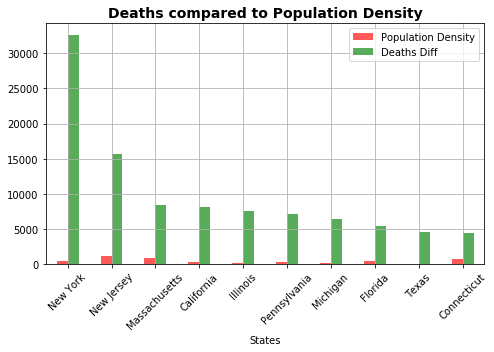

In [11]:
deaths_by_pop_density_df.head(10).plot(kind = "bar", alpha = 0.65, color = ("r", "g"), align = "center", figsize = (7, 5), legend = True)
plt.title("Deaths compared to Population Density", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.grid()
plt.tight_layout()
plt.savefig("Deaths by Pop Density - Bar.png")
plt.show()

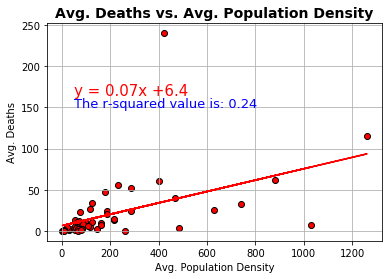

In [17]:
avg_pop_den= max_date_df.groupby(["State Name"])["Population Density"].mean()
avg_death = max_date_df.groupby(["State Name"])["Deaths Diff"].mean()

x_values = avg_pop_den
y_values = avg_death

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
rsq = "The r-squared value is: " + str(round(rvalue**2, 2))

plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 165), fontsize = 15, color = "red")
plt.annotate(rsq, (50, 150), fontsize = 13, color = "blue")
plt.grid()
plt.title("Avg. Deaths vs. Avg. Population Density", fontsize = 14, fontweight = "bold")
plt.xlabel("Avg. Population Density")
plt.ylabel("Avg. Deaths")


plt.savefig("Pop Density vs. Deaths - Scatter.png")
plt.show()

In [18]:
correlation = st.pearsonr(avg_pop_den, avg_death)
print(correlation)
corr = (f"The correlation between both is {round(correlation[0], 2)}")

(0.4854536586650192, 0.0003523525248887819)


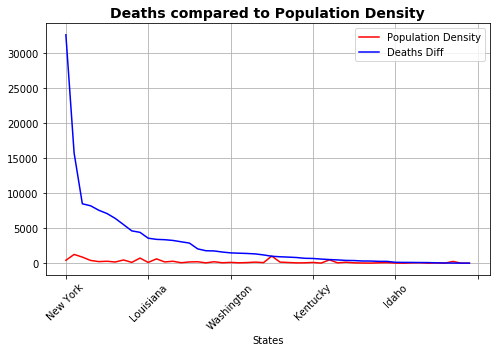

In [19]:
deaths_by_pop_density_df.plot(kind = "line", alpha = 1.0, color = ("r", "b"), figsize = (7, 5), legend = True)
plt.title("Deaths compared to Population Density", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.grid()
plt.tight_layout()
plt.savefig("Deaths by Pop Density - Line.png")
plt.show()

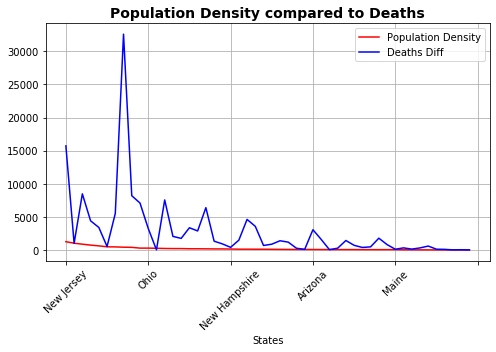

In [20]:
pop_density_vs_deaths_df.plot(kind = "line", alpha = 1.0, color = ("r", "b"), figsize = (7, 5), legend = True)
plt.title("Population Density compared to Deaths", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.grid()
plt.tight_layout()
plt.savefig("Pop Density by Deaths - Line.png")
plt.show()